In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df['Month']=pd.to_datetime(df['Month'])

In [4]:
df.set_index('Month',inplace=True)

In [5]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [6]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

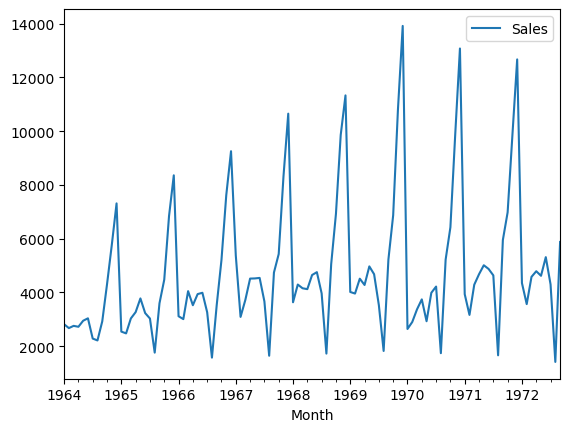

In [7]:
df.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
test_result=adfuller(df['Sales'])

In [11]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [12]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [13]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [14]:
df.head(14)

,Sales,Seasonal First Difference
Month,,
1964-01-01,2815,NaN
1964-02-01,2672,NaN
1964-03-01,2755,NaN
1964-04-01,2721,NaN
1964-05-01,2946,NaN
1964-06-01,3036,NaN
1964-07-01,2282,NaN
1964-08-01,2212,NaN
1964-09-01,2922,NaN


In [15]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

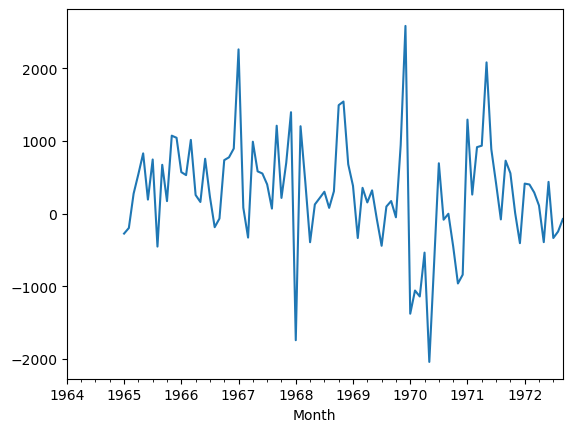

In [16]:
df['Seasonal First Difference'].plot()

In [24]:
from statsmodels.tsa.arima.model import ARIMA
p = 3  
d = 1  
q = 2  

model = ARIMA(df['Sales'], order=(p, d, q))

model_fit=model.fit()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [25]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -947.035
Date:                Thu, 27 Apr 2023   AIC                           1906.071
Time:                        10:32:04   BIC                           1921.937
Sample:                    01-01-1964   HQIC                          1912.499
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2469      0.146     -1.697      0.090      -0.532       0.038
ar.L2          0.1427      0.151      0.944      0.345      -0.154       0.439
ar.L3         -0.1104      0.185     -0.597      0.550      -0.473       0.252
ma.L1         -0.0840      0.108     -0.778      0.437      -0.296       0.128
ma.L2         -0.8321      0.114     -7.268      0.000      -1.057      -0.608
sigma2      4.661e+06   6.53e+05      7.140      0.000    3.38e+06    5.94e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 1.26
Prob(Q):                              0.59   Prob(JB):                         0.53
Heteroskedasticity (H):               3.52   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

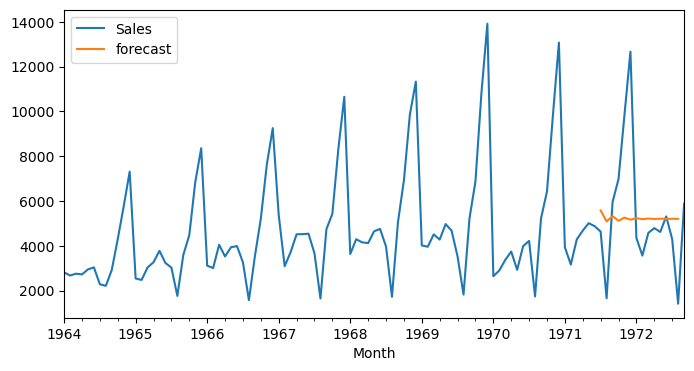

In [31]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(8,4))

In [17]:
import statsmodels.api as sm

In [18]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

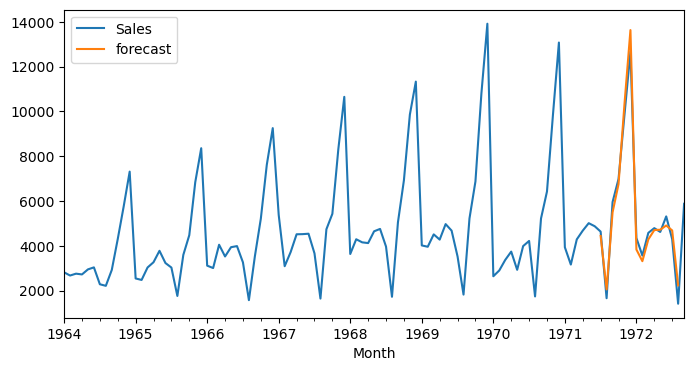

In [19]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(8,4))

In [20]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [21]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [22]:
future_datest_df.tail()

,Sales,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [23]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

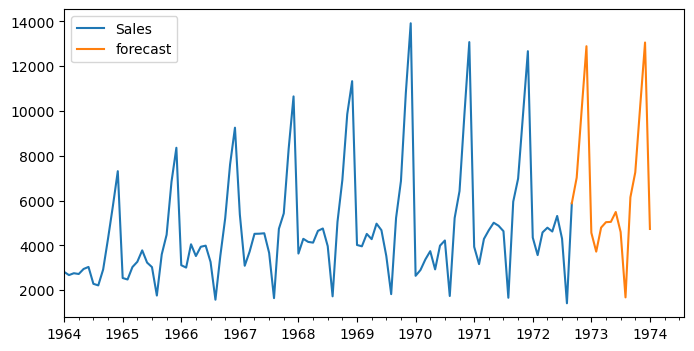

In [24]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(8, 4)) 